# Importing the modules and dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interractivity = 'all'

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_rows
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv("loan.csv")

# Data Description

In [4]:
df.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
df.describe(include ='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,0.0,39717.0,39717,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
df.shape

(39717, 111)

In [8]:
df.isnull().sum()

id                                0    
member_id                         0    
loan_amnt                         0    
funded_amnt                       0    
funded_amnt_inv                   0    
term                              0    
int_rate                          0    
installment                       0    
grade                             0    
sub_grade                         0    
emp_title                         2459 
emp_length                        1075 
home_ownership                    0    
annual_inc                        0    
verification_status               0    
issue_d                           0    
loan_status                       0    
pymnt_plan                        0    
url                               0    
desc                              12940
purpose                           0    
title                             11   
zip_code                          0    
addr_state                        0    
dti                               0    


# Cleaning NULL values from the dataset

Cleaning null values and rows with loan status as current 

In [9]:
df = df.dropna(axis=1, how='all')

In [12]:
df.drop(df[df['loan_status'] == 'Current'].index, inplace = True)

In [13]:
df.shape

(38577, 57)

In [16]:
df = df.dropna(axis=1, how='all')

In [17]:
df.loan_status = pd.Categorical(df.loan_status)

In [18]:
df['Default_status'] = df.loan_status.cat.codes

Cleaning columns with null values more than 60 %

In [19]:
perc = 60.0 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)

In [20]:
df.shape

(38577, 55)

In [21]:
#finding the correlation
df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Default_status
id,1.000000,0.993534,0.120614,0.131283,0.231603,0.076088,0.005572,0.091785,-0.008417,-0.041021,0.016256,-0.017683,0.001357,0.039902,NaN,NaN,0.110432,0.194832,0.092979,0.123268,-0.055789,0.038686,-0.010916,0.142251,NaN,NaN,NaN,NaN,NaN,-0.007997,NaN,-0.042390
member_id,0.993534,1.000000,0.120393,0.130307,0.241324,0.070918,0.006442,0.092910,-0.007905,-0.045879,0.013804,-0.017066,-0.001983,0.042217,NaN,NaN,0.111810,0.205195,0.093773,0.126660,-0.058497,0.036526,-0.012831,0.142582,NaN,NaN,NaN,NaN,NaN,-0.007346,NaN,-0.039798
loan_amnt,0.120614,0.120393,1.000000,0.981790,0.937922,0.932260,0.268999,0.062436,-0.031951,0.012940,0.177200,-0.049997,0.314022,0.256179,NaN,NaN,0.881910,0.847635,0.845870,0.728343,0.047103,0.142789,0.077005,0.474614,NaN,NaN,NaN,NaN,NaN,-0.035981,NaN,-0.059463
funded_amnt,0.131283,0.130307,0.981790,1.000000,0.956172,0.958035,0.264798,0.062194,-0.031866,0.012857,0.175682,-0.050576,0.306501,0.250551,NaN,NaN,0.898709,0.864501,0.864082,0.736654,0.049465,0.143452,0.078769,0.478448,NaN,NaN,NaN,NaN,NaN,-0.036995,NaN,-0.056497
funded_amnt_inv,0.231603,0.241324,0.937922,0.956172,1.000000,0.905464,0.251981,0.070663,-0.038171,-0.002800,0.162738,-0.051470,0.286265,0.242715,NaN,NaN,0.874730,0.909127,0.838587,0.726736,0.029379,0.130997,0.064282,0.469166,NaN,NaN,NaN,NaN,NaN,-0.041193,NaN,-0.037781
installment,0.076088,0.070918,0.932260,0.958035,0.905464,1.000000,0.267842,0.052038,-0.019755,0.011014,0.172893,-0.045706,0.309501,0.229860,NaN,NaN,0.858493,0.817665,0.847762,0.642655,0.058387,0.121463,0.077519,0.413588,NaN,NaN,NaN,NaN,NaN,-0.033361,NaN,-0.027153
annual_inc,0.005572,0.006442,0.268999,0.264798,0.251981,0.267842,1.000000,-0.121530,0.022229,0.035465,0.156927,-0.017864,0.277374,0.234534,NaN,NaN,0.256313,0.245198,0.256848,0.185056,0.006814,0.022184,0.015981,0.143242,NaN,NaN,NaN,NaN,NaN,-0.016224,NaN,0.040867
dti,0.091785,0.092910,0.062436,0.062194,0.070663,0.052038,-0.121530,1.000000,-0.033347,0.002178,0.287849,-0.004742,0.228090,0.229119,NaN,NaN,0.059274,0.066277,0.036755,0.103104,-0.011412,0.026162,0.011744,0.008566,NaN,NaN,NaN,NaN,NaN,0.005966,NaN,-0.045078
delinq_2yrs,-0.008417,-0.007905,-0.031951,-0.031866,-0.038171,-0.019755,0.022229,-0.033347,1.000000,0.008733,0.011649,0.007623,-0.054437,0.066994,NaN,NaN,-0.023130,-0.029608,-0.038447,0.023778,0.028772,0.012443,0.014077,-0.012511,NaN,NaN,NaN,NaN,NaN,0.003404,NaN,-0.020096
inq_last_6mths,-0.041021,-0.045879,0.012940,0.012857,-0.002800,0.011014,0.035465,0.002178,0.008733,1.000000,0.093434,0.023726,-0.020787,0.113516,NaN,NaN,-0.008244,-0.018589,-0.021328,0.026549,0.030741,0.018899,0.012388,0.027772,NaN,NaN,NaN,NaN,NaN,0.015517,NaN,-0.071878


# Improving the dataset 

Altering the columns with convinient data types and data format . Describing new columns.

In [22]:
df['term']=df['term'].apply(lambda x: int(x.split(' ')[1]))

In [23]:
df = df.dropna(subset = ['emp_length'])

In [24]:
df['emp_length'] = df['emp_length'].apply(lambda x: 10 if x=='10+ years' else 0 if x=='< 1 year' else int(x.split(' ')[0]))

In [25]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.split('%')[0]))

In [27]:
df.shape

(37544, 55)

In [28]:
import datetime
df['day']=df['issue_d'].apply(lambda x: int(x.split('-')[-1]))
df['month']=df['issue_d'].apply(lambda x: x.split('-')[0])

In [29]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Default_status,day,month
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1,11,Dec
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0,11,Dec
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1,11,Dec
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1,11,Dec
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075269,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1,11,Dec


In [33]:

df['debt_amount'] = df['dti']*df['annual_inc']

# Correlation status data improvisation

Segregating out the required columns from the dataset
Chceking the outliers
Splitting the dataset into new datasets based on Loan Status 

In [30]:
df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Default_status,day
id,1.000000,0.993497,0.125203,0.135822,0.237490,0.181958,0.058250,0.079642,0.110311,0.008949,0.091783,-0.008238,-0.040835,0.018054,-0.019355,0.001765,0.041076,NaN,NaN,0.114749,0.200273,0.096999,0.127011,-0.055757,0.039370,-0.010759,0.145261,NaN,NaN,NaN,NaN,NaN,-0.010225,NaN,-0.041580,0.848261
member_id,0.993497,1.000000,0.125280,0.135138,0.247598,0.200597,0.055243,0.074751,0.115092,0.010072,0.093152,-0.007689,-0.045809,0.015699,-0.019064,-0.001414,0.043507,NaN,NaN,0.116463,0.211045,0.098131,0.130660,-0.058416,0.037186,-0.012678,0.145701,NaN,NaN,NaN,NaN,NaN,-0.009929,NaN,-0.038833,0.884347
loan_amnt,0.125203,0.125280,1.000000,0.981603,0.936871,0.345564,0.299237,0.931686,0.148895,0.266282,0.061402,-0.033757,0.013068,0.174008,-0.046378,0.313399,0.255538,NaN,NaN,0.881427,0.846599,0.845349,0.727398,0.046943,0.142253,0.076333,0.473563,NaN,NaN,NaN,NaN,NaN,-0.031758,NaN,-0.062680,0.115074
funded_amnt,0.135822,0.135138,0.981603,1.000000,0.955300,0.323564,0.302955,0.957721,0.148661,0.261959,0.061251,-0.033857,0.013111,0.172546,-0.046898,0.306119,0.249803,NaN,NaN,0.898430,0.863661,0.863826,0.735697,0.049246,0.142846,0.078043,0.477534,NaN,NaN,NaN,NaN,NaN,-0.032708,NaN,-0.059535,0.126093
funded_amnt_inv,0.237490,0.247598,0.936871,0.955300,1.000000,0.343151,0.295697,0.904110,0.159903,0.249320,0.070007,-0.040029,-0.002744,0.159554,-0.048416,0.285718,0.241953,NaN,NaN,0.873913,0.909088,0.837743,0.725513,0.028867,0.130528,0.063602,0.468238,NaN,NaN,NaN,NaN,NaN,-0.037598,NaN,-0.040097,0.259073
term,0.181958,0.200597,0.345564,0.323564,0.343151,1.000000,0.440717,0.087956,0.104577,0.043201,0.078386,0.006916,0.047447,0.045531,0.012295,0.066299,0.095376,NaN,NaN,0.304630,0.320390,0.198696,0.506627,0.013678,0.112795,0.036963,0.270151,NaN,NaN,NaN,NaN,NaN,0.017485,NaN,-0.175200,0.242682
int_rate,0.058250,0.055243,0.299237,0.302955,0.295697,0.440717,1.000000,0.274791,0.000390,0.046092,0.112188,0.158199,0.132576,0.007594,0.098996,0.095136,-0.045310,NaN,NaN,0.289022,0.283441,0.172606,0.520651,0.094679,0.128770,0.069926,0.173900,NaN,NaN,NaN,NaN,NaN,0.082988,NaN,-0.213497,0.044083
installment,0.079642,0.074751,0.931686,0.957721,0.904110,0.087956,0.274791,1.000000,0.121996,0.264684,0.050727,-0.021675,0.011296,0.169816,-0.042153,0.309157,0.229250,NaN,NaN,0.857792,0.816278,0.847326,0.640841,0.057736,0.120691,0.076838,0.412144,NaN,NaN,NaN,NaN,NaN,-0.029352,NaN,-0.029868,0.057550
emp_length,0.110311,0.115092,0.148895,0.148661,0.159903,0.104577,0.000390,0.121996,1.000000,0.110831,0.050268,0.015690,0.009475,0.096710,0.064025,0.150441,0.207738,NaN,NaN,0.131991,0.142616,0.123683,0.116310,-0.017200,0.025396,0.006048,0.084057,NaN,NaN,NaN,NaN,NaN,0.062669,NaN,-0.016126,0.118614
annual_inc,0.008949,0.010072,0.266282,0.261959,0.249320,0.043201,0.046092,0.264684,0.110831,1.000000,-0.123582,0.021229,0.035976,0.154494,-0.014369,0.276693,0.233436,NaN,NaN,0.253217,0.242284,0.253715,0.182741,0.006246,0.021868,0.015797,0.141339,NaN,NaN,NaN,NaN,NaN,-0.012378,NaN,0.038501,0.012689


Most of the columns with highest correlation to the default status are the parameters that are obtained only after the loan is approved .
So after evaluating the correlation of such columns with the primary details of the customer that can be obtained before the loan is approved , we have selected the columns that have indirect dependence of the default staus on them .
Such as loan amount , installments , funded amount and funded amount by the invester .etc.

In [31]:
df.drop(['out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code','acc_now_delinq','delinq_amnt','tax_liens','delinq_2yrs','inq_last_6mths','url','desc','zip_code','earliest_cr_line','revol_bal','revol_util','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','total_pymnt','total_pymnt_inv','chargeoff_within_12_mths','funded_amnt','funded_amnt_inv','initial_list_status','pymnt_plan','emp_title','title','open_acc','total_acc','application_type'],axis = 1, inplace = True)


In [32]:
df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,Default_status,day,month
0,1077501,1296599,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0,1,11,Dec
1,1077430,1314167,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0,0,11,Dec
2,1077175,1313524,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0,1,11,Dec
3,1076863,1277178,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0,1,11,Dec
5,1075269,1311441,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.0,1,11,Dec


In [34]:
default = df[df['loan_status']=='Charged Off']

In [35]:
paid = df[df['loan_status']=='Fully Paid']

# Exploratory Data Analysis

In [36]:
df.describe(include = 'all')

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,Default_status,day,month,debt_amount
count,3.754400e+04,3.754400e+04,37544.000000,37544.000000,37544.000000,37544.000000,37544,37544,37544.000000,37544,3.754400e+04,37544,37544,37544,37544,37544,37544.000000,37544.000000,36847.000000,37544.000000,37544.000000,37544,3.754400e+04
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,35,NaN,5,NaN,3,55,2,14,50,NaN,NaN,NaN,NaN,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,B,A4,NaN,RENT,NaN,Not Verified,Dec-11,Fully Paid,debt_consolidation,CA,NaN,NaN,NaN,NaN,NaN,Dec,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,11359,2792,NaN,18078,NaN,16278,1994,32145,17675,6768,NaN,NaN,NaN,NaN,NaN,4120,NaN
mean,6.743002e+05,8.394864e+05,11119.329986,41.917537,11.963319,324.650164,NaN,NaN,4.940976,NaN,6.940708e+04,NaN,NaN,NaN,NaN,NaN,13.284186,0.053724,0.041794,0.856195,10.298530,NaN,8.687810e+05
std,2.098464e+05,2.655176e+05,7354.098954,10.344394,3.683012,208.901055,NaN,NaN,3.557082,NaN,6.467698e+04,NaN,NaN,NaN,NaN,NaN,6.660551,0.234622,0.200799,0.350896,0.889106,NaN,6.521515e+05
min,5.473400e+04,7.069900e+04,500.000000,36.000000,5.420000,15.690000,NaN,NaN,0.000000,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,7.000000,NaN,0.000000e+00
25%,5.091155e+05,6.564908e+05,5500.000000,36.000000,8.940000,167.370000,NaN,NaN,2.000000,NaN,4.100000e+04,NaN,NaN,NaN,NaN,NaN,8.160000,0.000000,0.000000,1.000000,10.000000,NaN,4.262926e+05
50%,6.534655e+05,8.352880e+05,10000.000000,36.000000,11.830000,280.000000,NaN,NaN,4.000000,NaN,6.000000e+04,NaN,NaN,NaN,NaN,NaN,13.380000,0.000000,0.000000,1.000000,11.000000,NaN,7.490000e+05
75%,8.269000e+05,1.034972e+06,15000.000000,36.000000,14.420000,428.942500,NaN,NaN,9.000000,NaN,8.300000e+04,NaN,NaN,NaN,NaN,NaN,18.550000,0.000000,0.000000,1.000000,11.000000,NaN,1.162500e+06


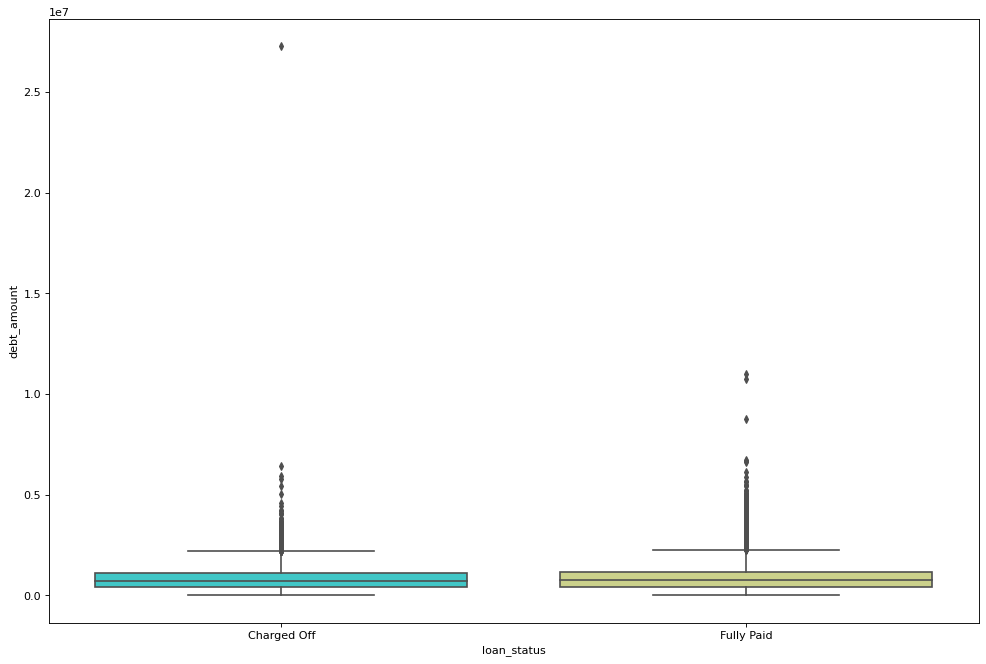

In [37]:
plt.figure(figsize=(15, 10), dpi=80)
sns.boxplot(x='loan_status',y='debt_amount',data=df,palette='rainbow')
plt.show()

.Comparing the median and mean of debt amount we can say that we have many outlier cases which can lead to bias .

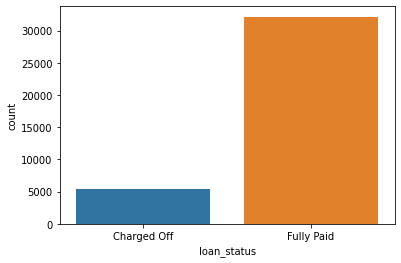

In [38]:
sns.countplot(x='loan_status',data=df)  
plt.show()  

There are more people who have Fully Paid the loan amounts than the Charged off

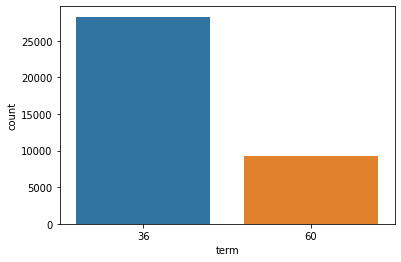

In [39]:
sns.countplot(x='term',data=df)  
plt.show()  

Most loans are of loan terms are of 36 months

<AxesSubplot:xlabel='loan_status', ylabel='count'>

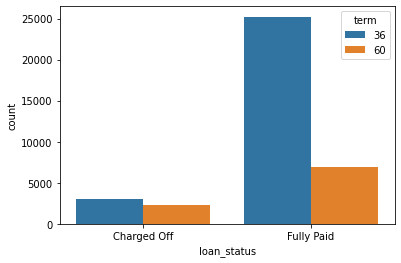

In [40]:
sns.countplot(x='loan_status',hue='term',data=df)

. Count of Charged Off customers for both terms are comparable while more than half of the Fully Paid customers belong to term of 36 months

<AxesSubplot:xlabel='loan_status', ylabel='count'>

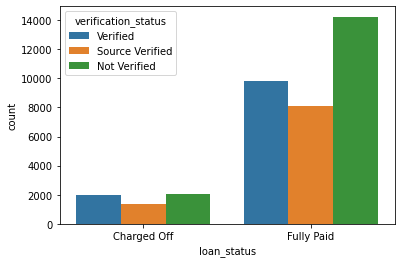

In [41]:
sns.countplot(x='loan_status',hue='verification_status',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

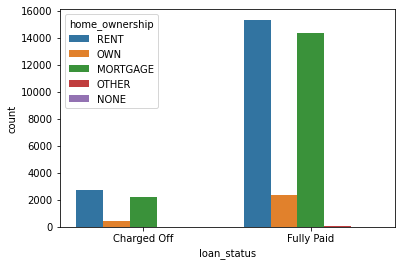

In [42]:
sns.countplot(x='loan_status',hue='home_ownership',data=df)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

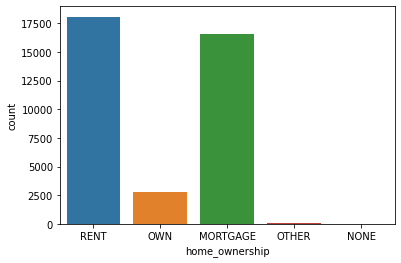

In [43]:
sns.countplot(x='home_ownership',data=df)

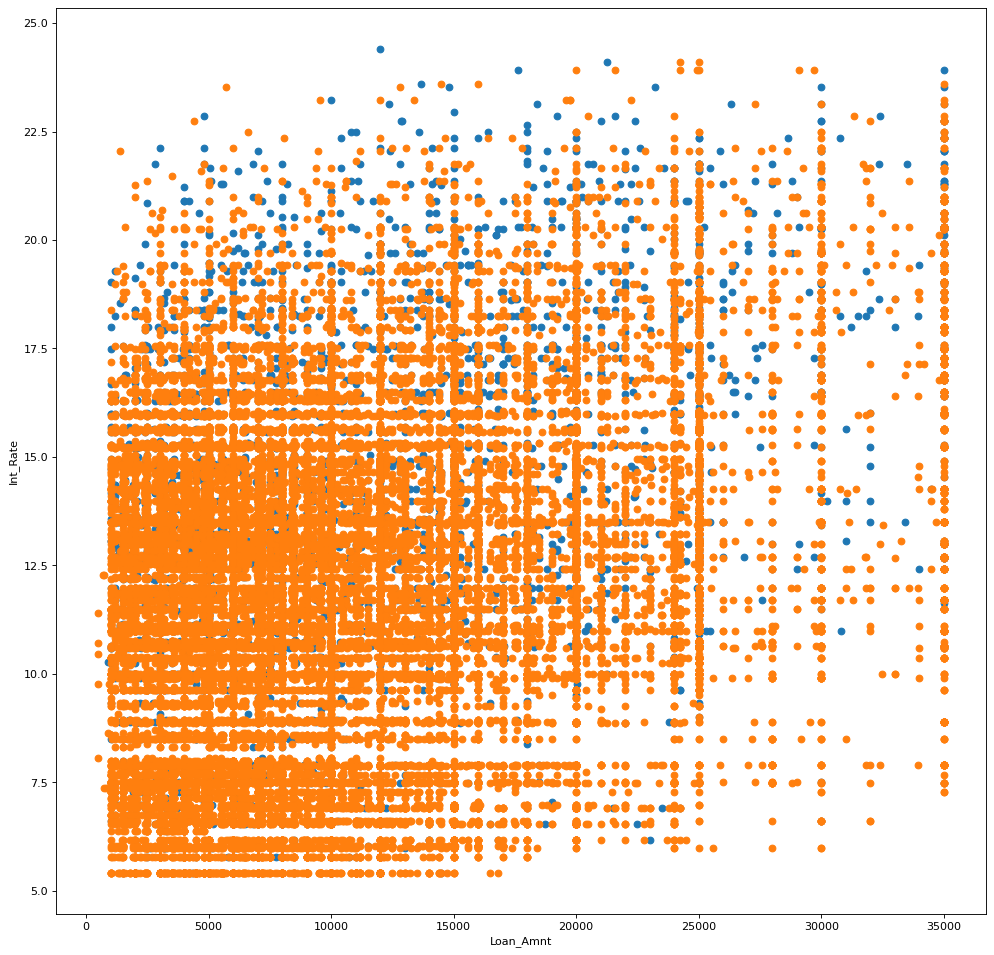

In [134]:
plt.figure(figsize=(15, 15), dpi=80)
plt.scatter(default['loan_amnt'], default['int_rate'])

#plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(paid['loan_amnt'], paid['int_rate'])

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 

plt.xlabel("Loan_Amnt")
plt.ylabel("Int_Rate")
plt.show()

. Even if the loan amount is low but the interest rate is too high then the count of charged off customers are       more than fully paid.

. For loan amounts above 25000, approved applications for loans have decreased significantly.

. For loan amounts greater than 25000 and interest rate above 15% people mostly charged off than fully paid . 

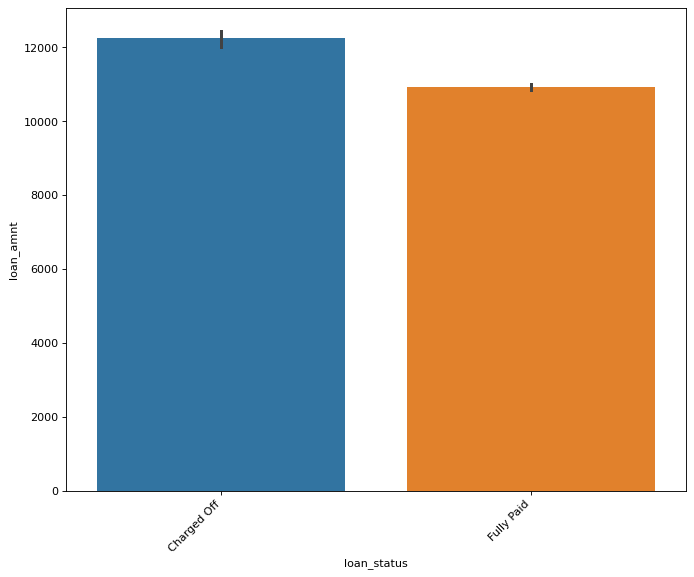

In [46]:
plt.figure(figsize=(10, 8), dpi=80)
sns.barplot(x='loan_status',y='loan_amnt',data=df)
plt.xticks(rotation=45, ha='right')
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.show()


. Average loan amount that has been mostly Fully paid is 11000 above which mostly were charged off

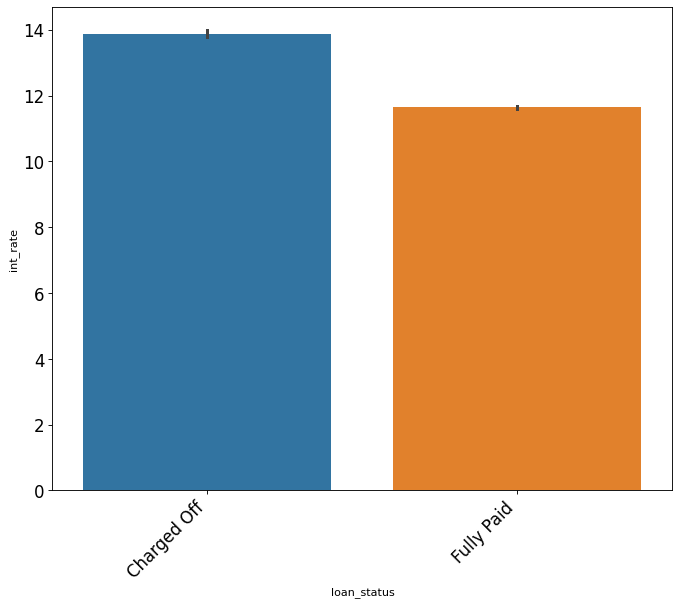

In [99]:
plt.figure(figsize=(10, 8), dpi=80)
sns.barplot(x='loan_status',y='int_rate',data=df)
plt.xticks(rotation=45, ha='right')
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 

plt.show()

. Average interest that has been mostly Fully paid is 12% above which mostly were charged off

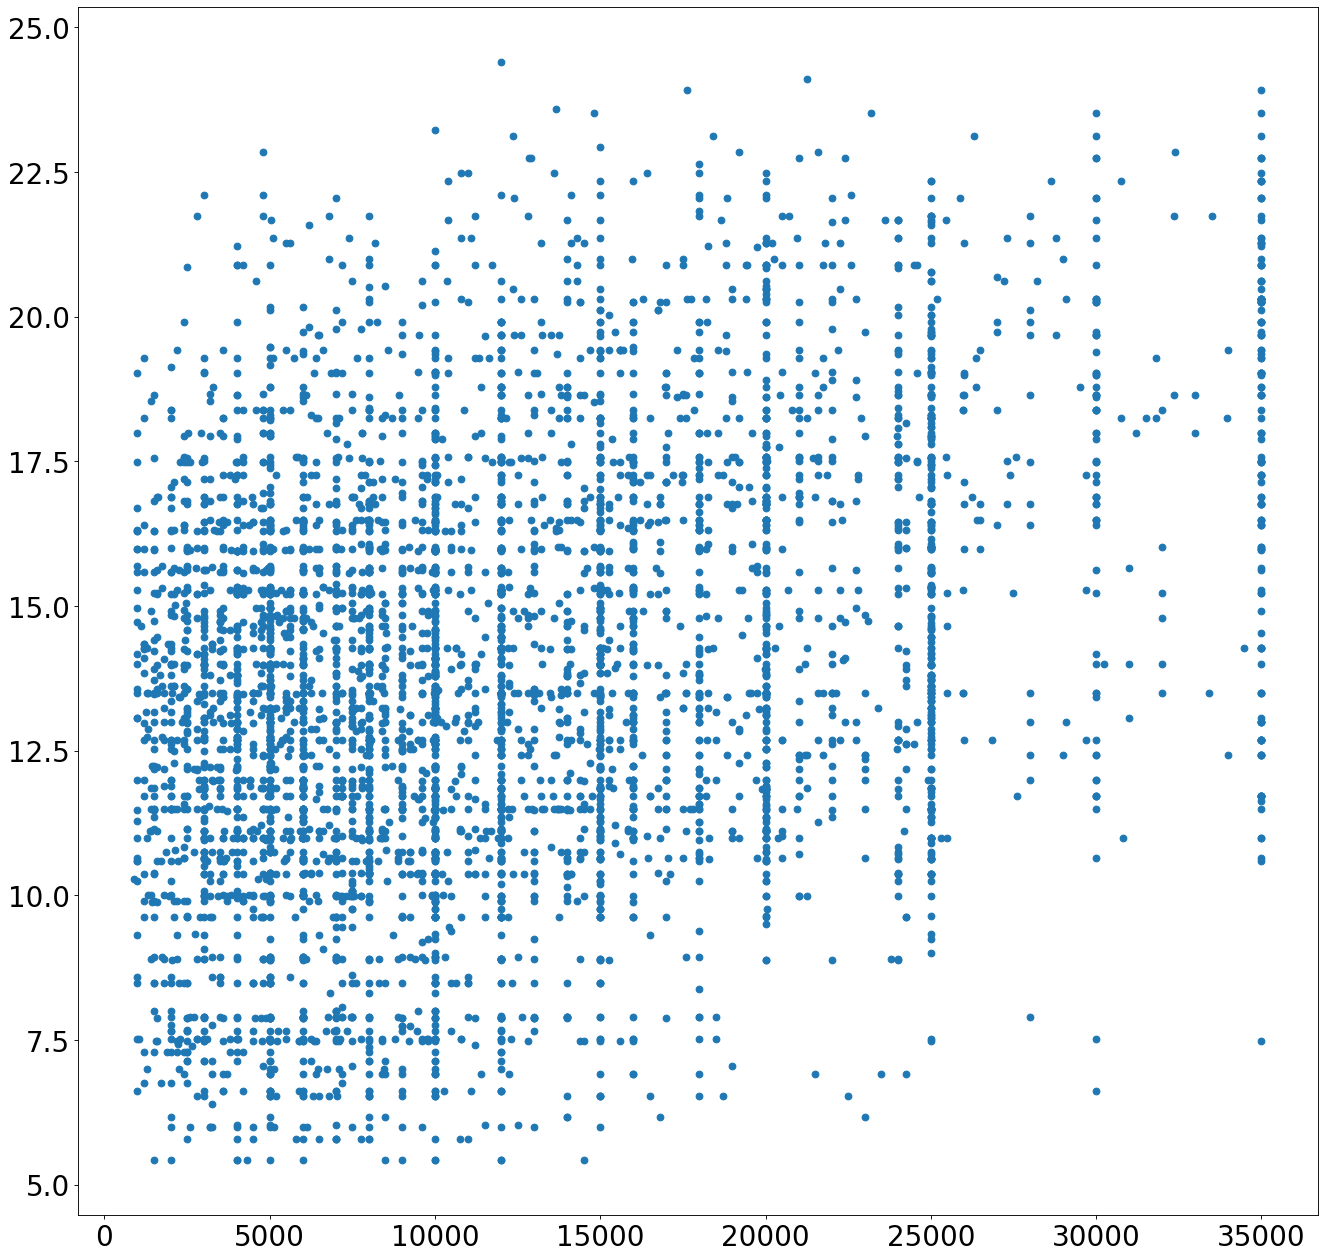

In [48]:
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(default['loan_amnt'], default['int_rate'])
plt.show()

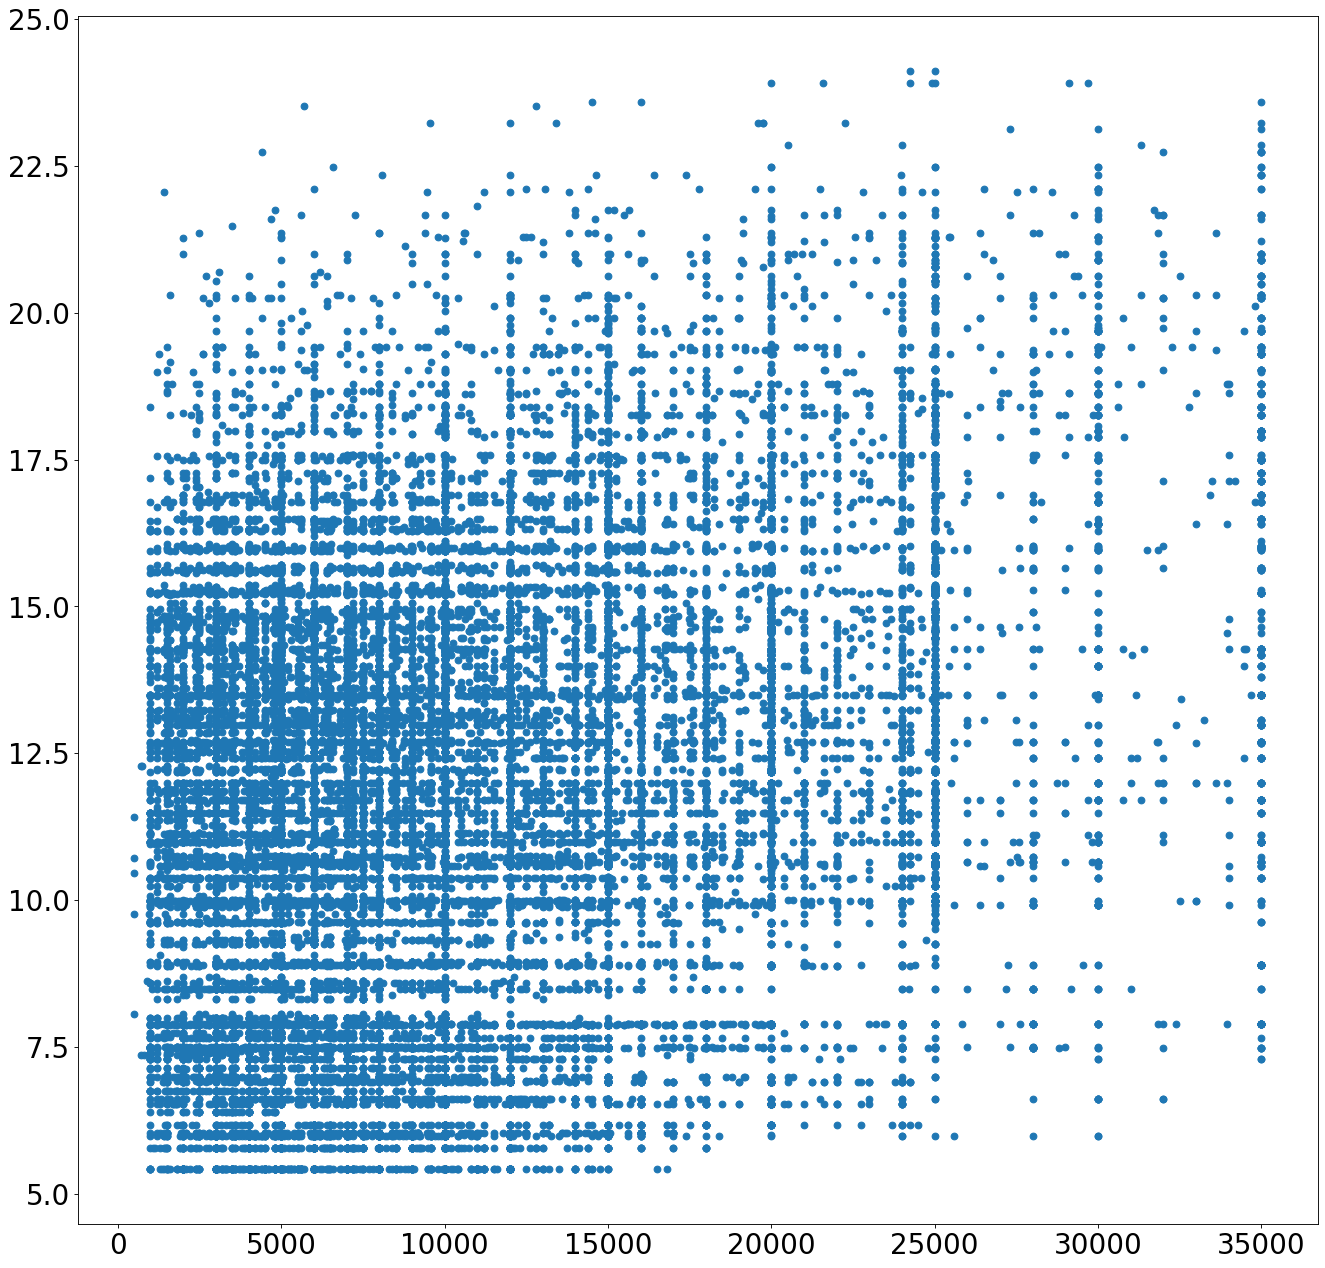

In [49]:
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(paid['loan_amnt'], paid['int_rate'])
plt.show()

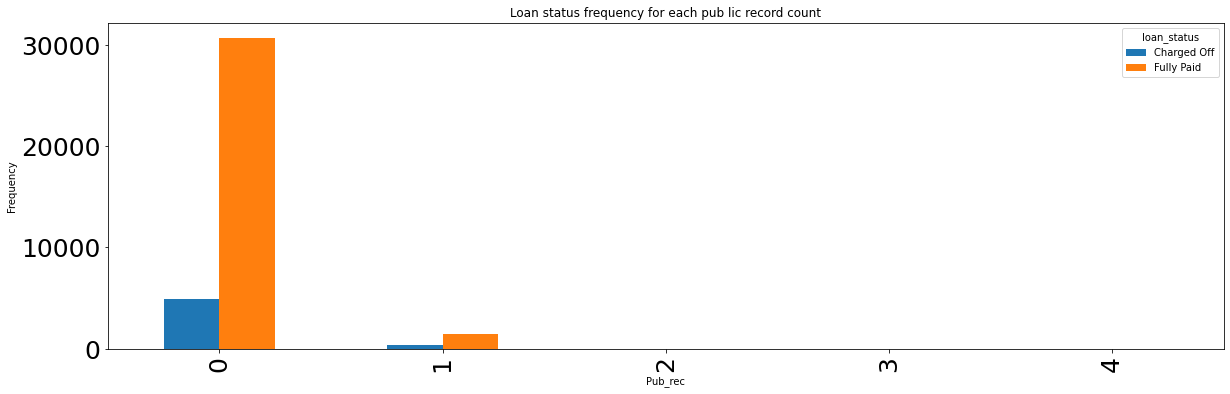

In [50]:
pd.crosstab(df.pub_rec,df.loan_status).plot(kind="bar",figsize=(20,6))
plt.title('Loan status frequency for each pub lic record count')
plt.xlabel('Pub_rec')
plt.ylabel('Frequency')
plt.savefig('LoanStatusFrequency.png')
plt.show()

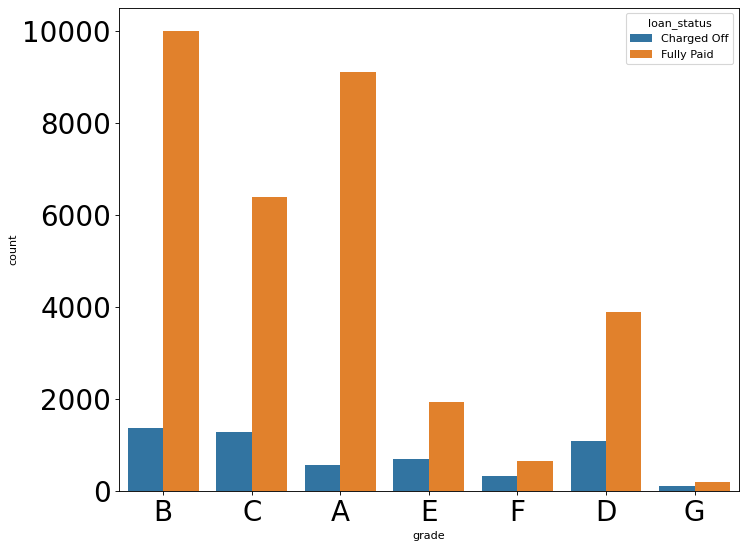

In [51]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(x='grade',hue='loan_status',data=df)
plt.show()

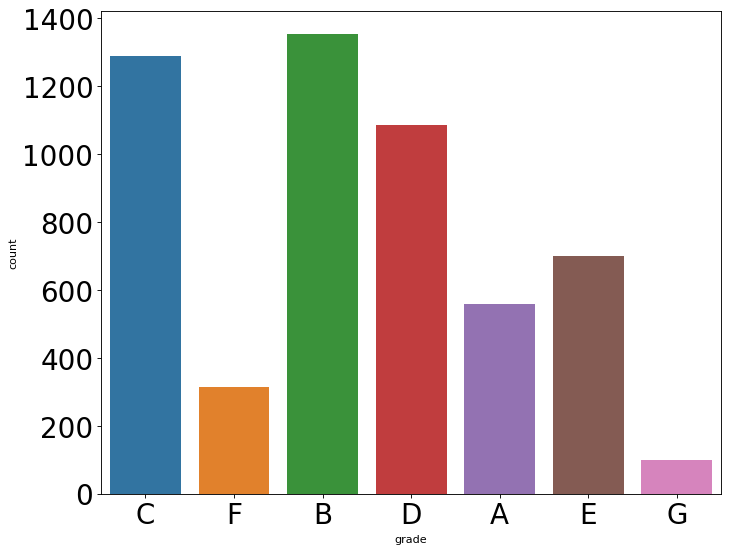

In [52]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(x='grade',data=default)
plt.show()

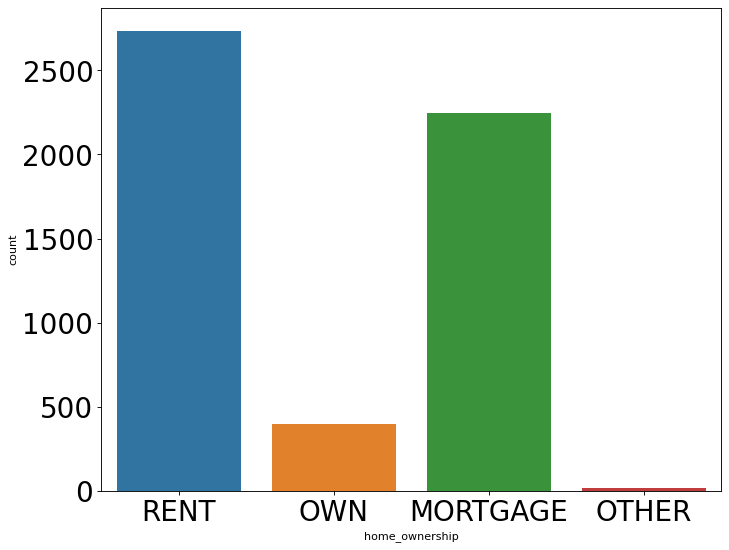

In [53]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(x='home_ownership',data=default)
plt.show()

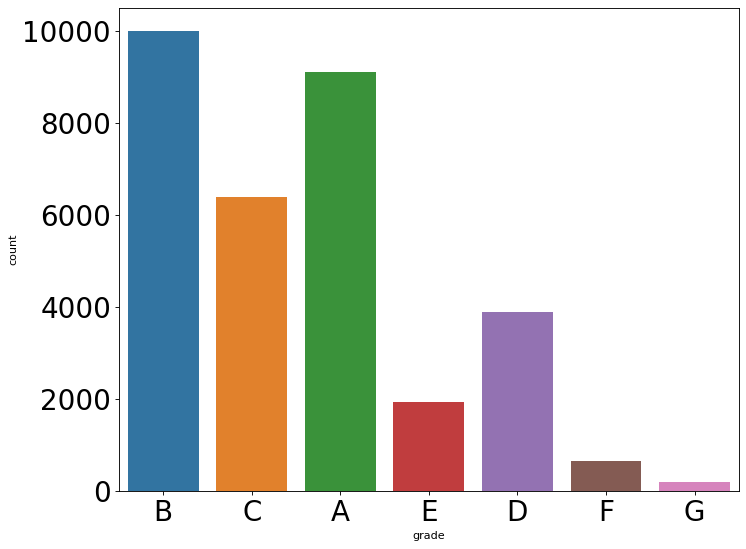

In [54]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(x='grade',data=paid)
plt.show()

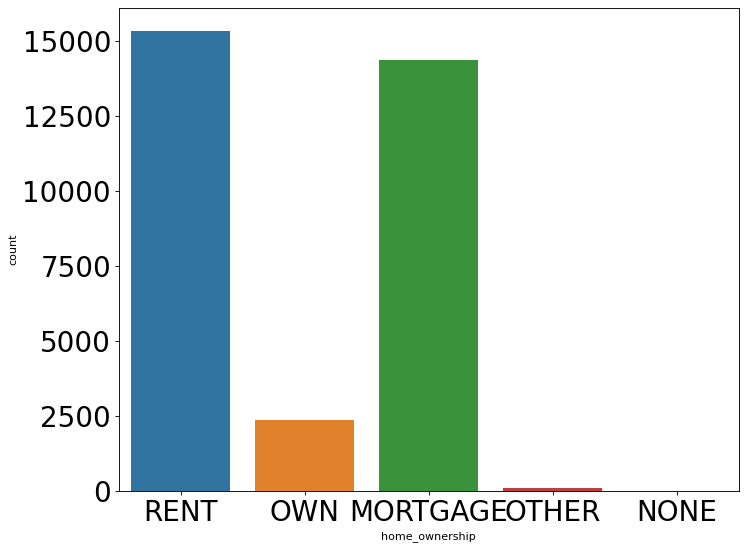

In [55]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(x='home_ownership',data=paid)
plt.show()

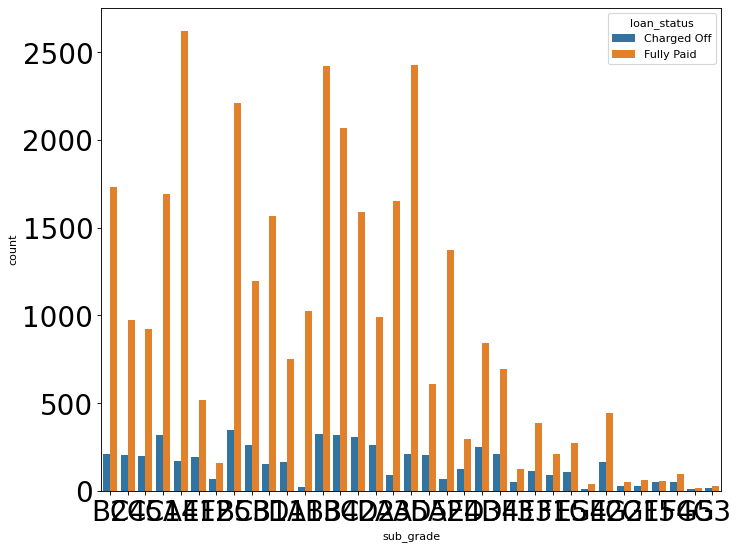

In [56]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(x='sub_grade',hue='loan_status',data=df)
plt.show()

In [57]:
df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,Default_status,day,month,debt_amount
0,1077501,1296599,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0,1,11,Dec,663600.00
1,1077430,1314167,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0,0,11,Dec,30000.00
2,1077175,1313524,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0,1,11,Dec,106837.44
3,1076863,1277178,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0,1,11,Dec,984000.00
5,1075269,1311441,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.0,1,11,Dec,403200.00


In [58]:
df.shape

(37544, 23)

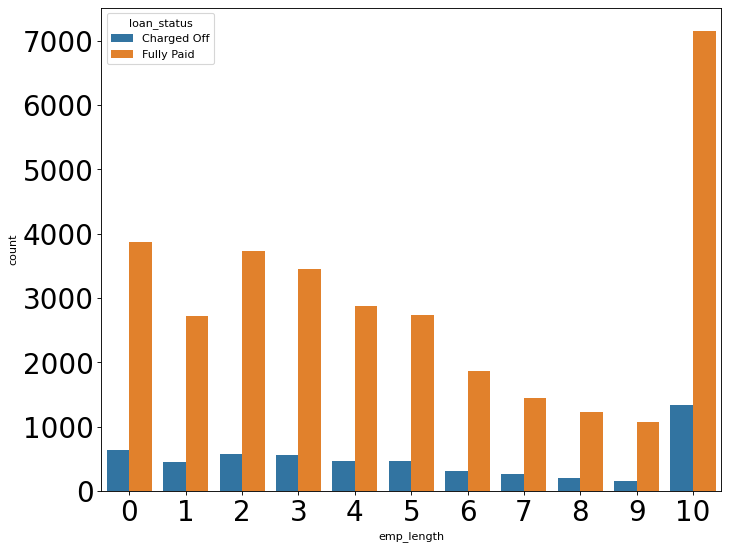

In [59]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(x='emp_length',hue='loan_status',data=df)
plt.show()

. People with experience of 10 years and higher are maximum in count for both the cases of charged off customers and fully paid.

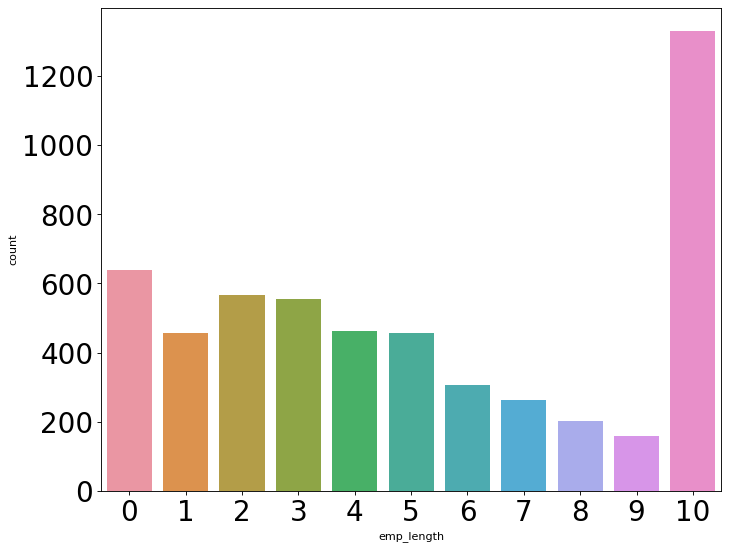

In [60]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(x='emp_length',data=default)
plt.show()

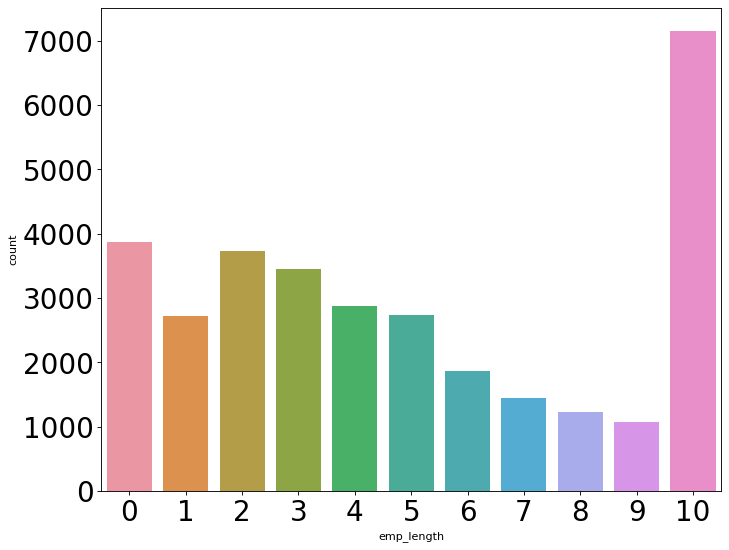

In [61]:
plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(x='emp_length',data=paid)
plt.show()

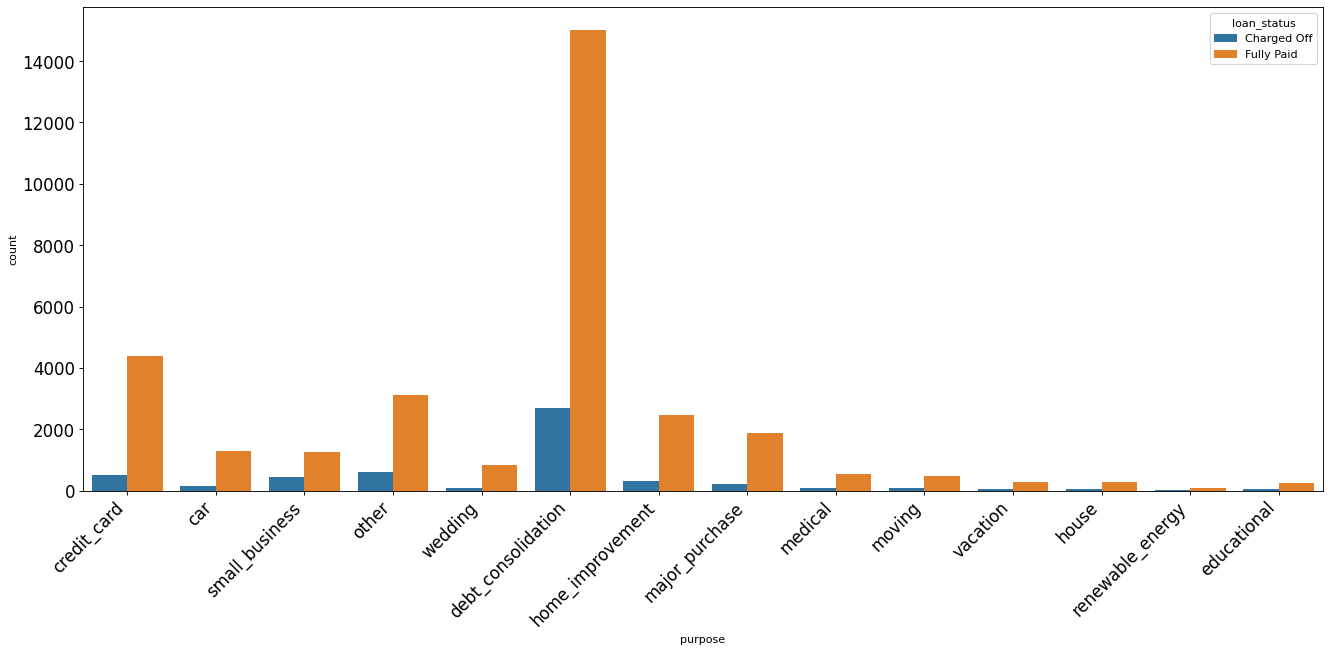

In [93]:
plt.figure(figsize=(20, 8), dpi=80)
sns.countplot(x='purpose',hue='loan_status',data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

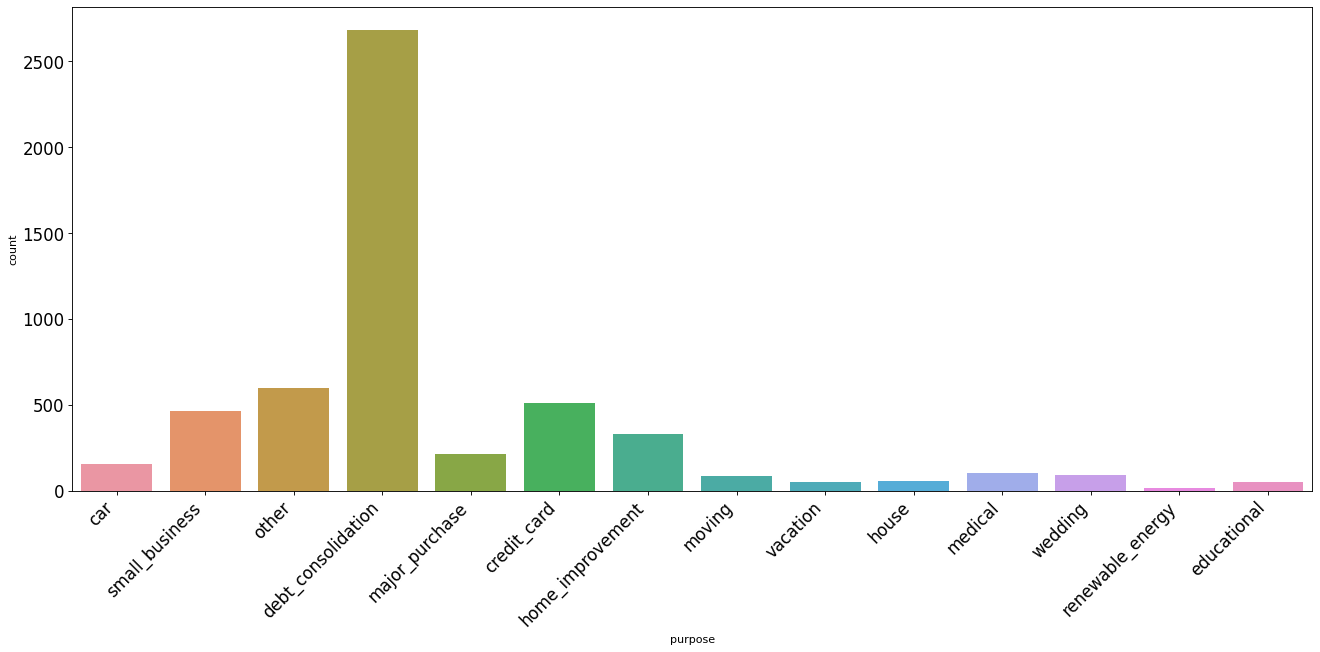

In [94]:
plt.figure(figsize=(20, 8), dpi=80)
sns.countplot(x='purpose',data=default)
plt.xticks(rotation=45, ha='right')
plt.show()

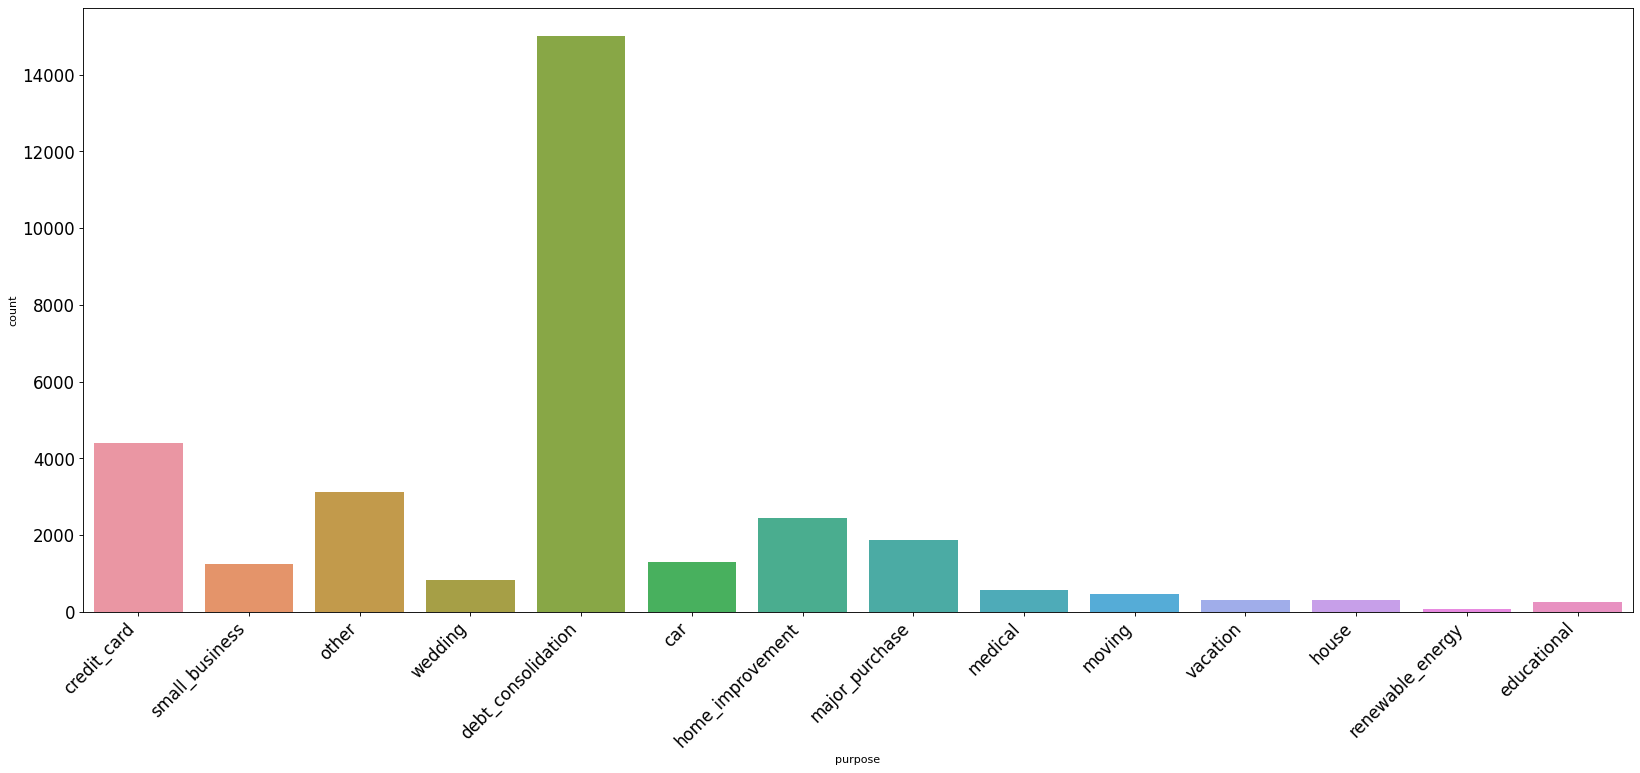

In [95]:
plt.figure(figsize=(25, 10), dpi=80)
sns.countplot(x='purpose',data=paid)
plt.xticks(rotation=45, ha='right')
plt.show()

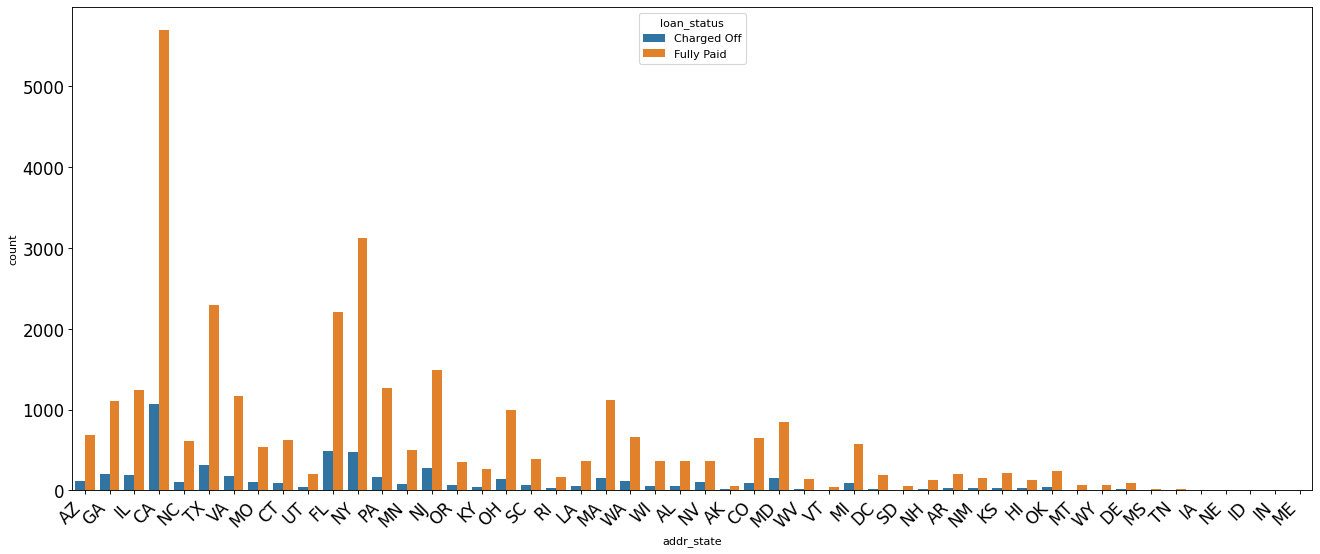

In [96]:
plt.figure(figsize=(20, 8), dpi=80)
sns.countplot(x='addr_state',hue='loan_status',data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

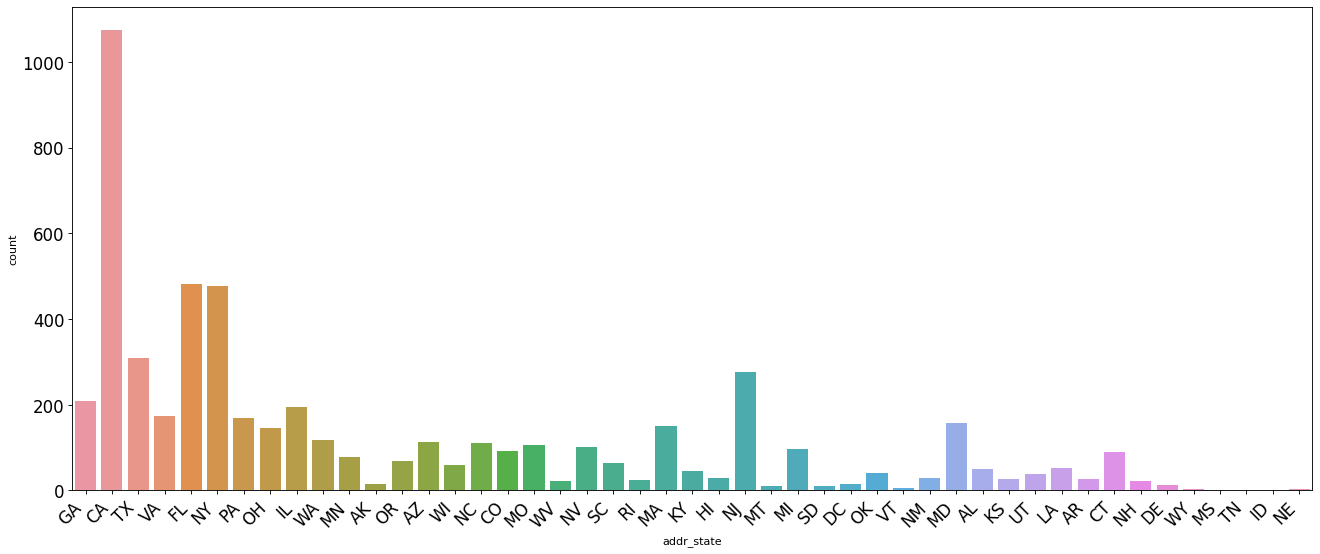

In [97]:
plt.figure(figsize=(20, 8), dpi=80)
sns.countplot(x='addr_state',data=default)
plt.xticks(rotation=45, ha='right')
plt.show()

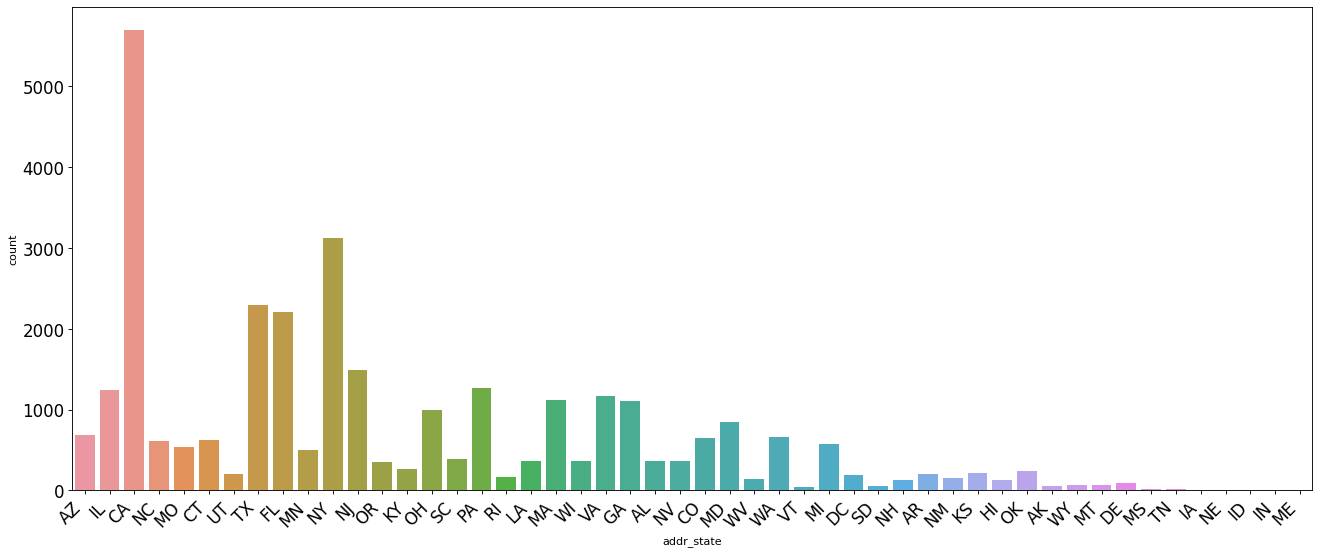

In [98]:
plt.figure(figsize=(20, 8), dpi=80)
sns.countplot(x='addr_state',data=paid)
plt.xticks(rotation=45, ha='right')
plt.show()

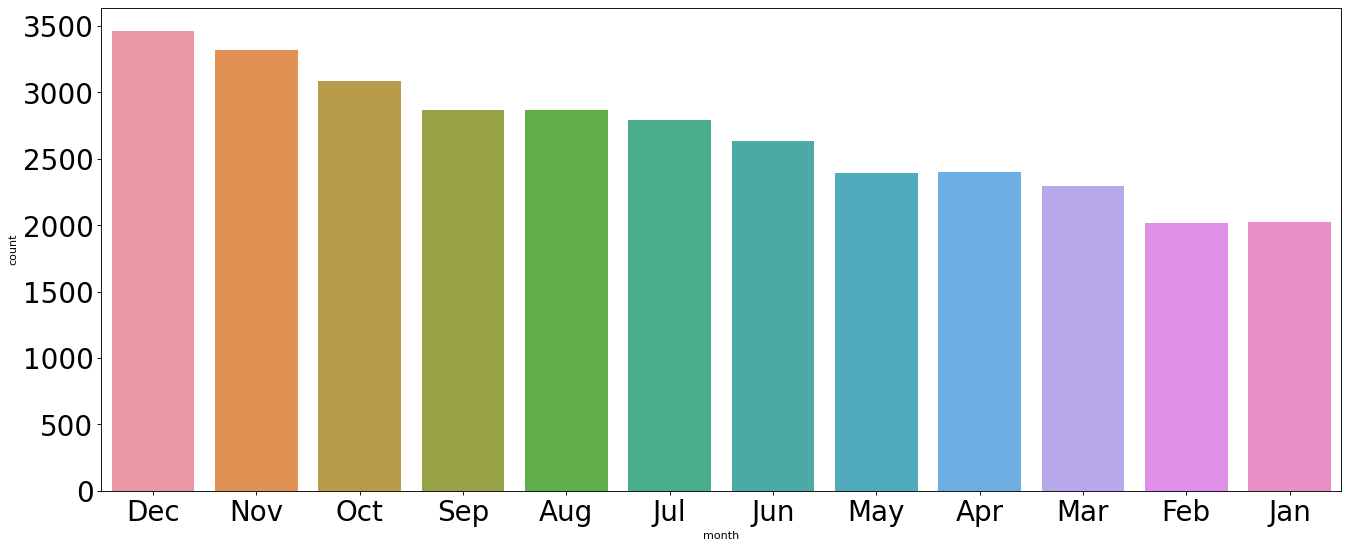

In [68]:
plt.figure(figsize=(20, 8), dpi=80)
sns.countplot(x='month',data=paid)
plt.show()

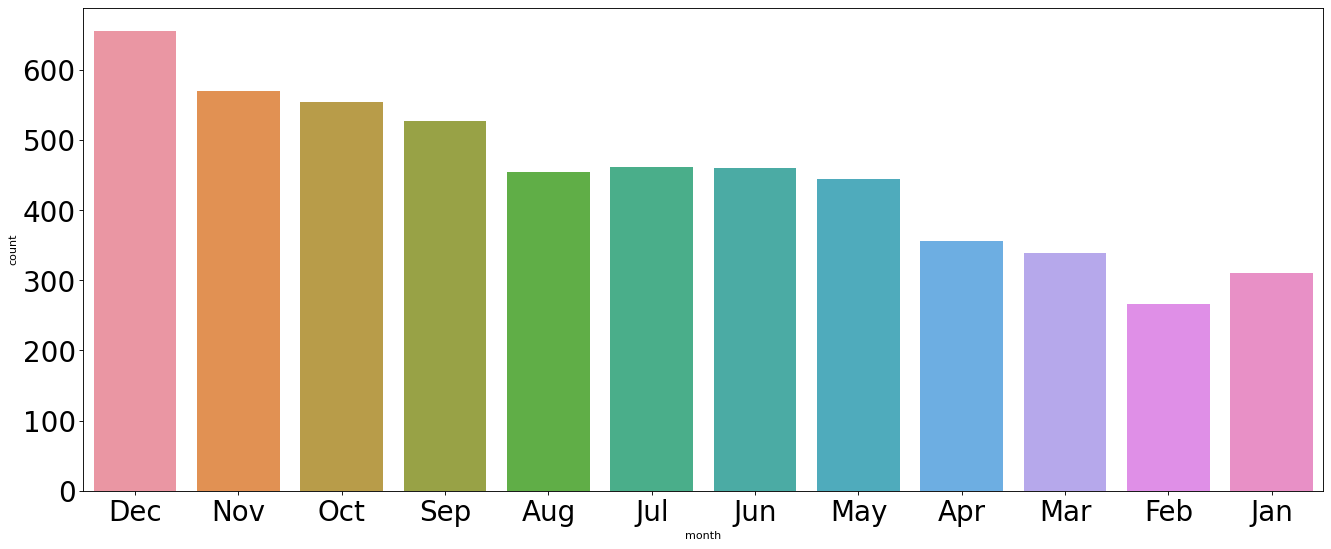

In [69]:
plt.figure(figsize=(20, 8), dpi=80)
sns.countplot(x='month',data=default)
plt.show()

. December has the most customers who apply for loans .

. In case of January and february there are least count of customers who have applied for loan but the count of defaulters are much less in case of February than in January even though count of Fully Paid customers are the same for both.

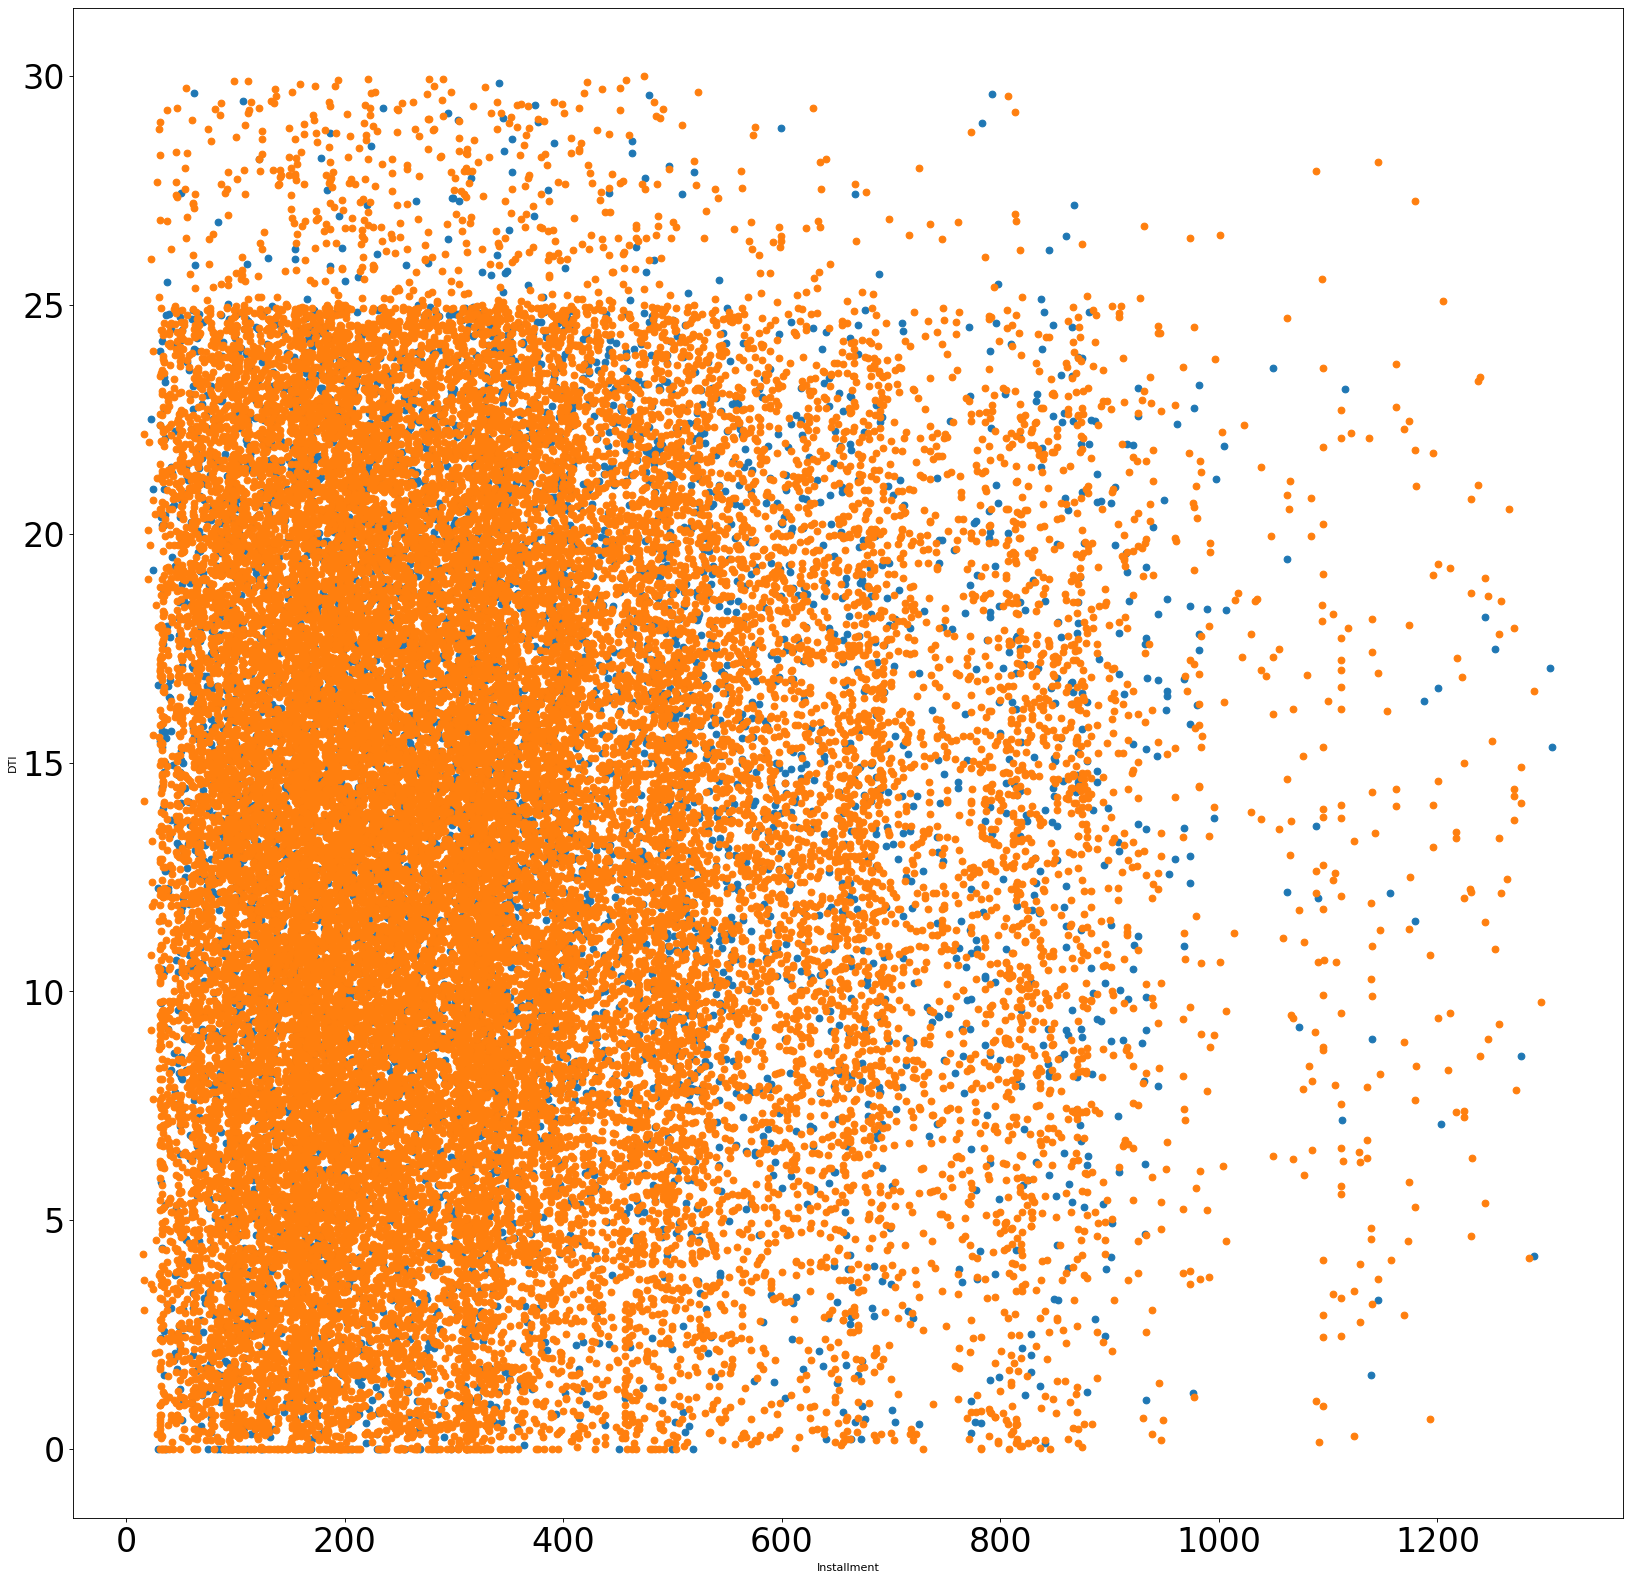

In [139]:
plt.figure(figsize=(25, 25), dpi=80)
plt.scatter(default['installment'], default['dti'])

#plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(paid['installment'], paid['dti'])

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 

plt.xlabel("Installment")
plt.ylabel("DTI")
plt.show()

.Loan applications have decreased significantly when dti is above 25 as well as when the installment amount increases more than approx. 900. But the charged off count is still comparably dense where the dti increase above 25 but the installment is still low than the charegd of counts in teh region below that dti level.

In [71]:
df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,Default_status,day,month,debt_amount
0,1077501,1296599,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0,1,11,Dec,663600.00
1,1077430,1314167,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0,0,11,Dec,30000.00
2,1077175,1313524,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0,1,11,Dec,106837.44
3,1076863,1277178,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0,1,11,Dec,984000.00
5,1075269,1311441,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.0,1,11,Dec,403200.00


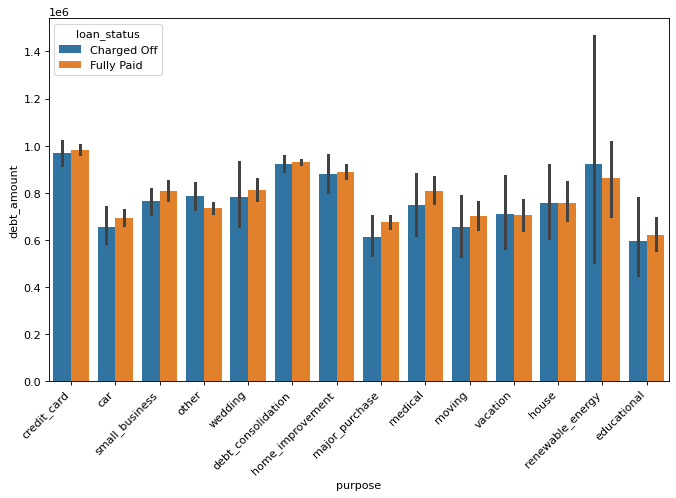

In [114]:
#import matplotlib

plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(x='purpose',y='debt_amount',hue='loan_status',data=df)
plt.xticks(rotation=45, ha='right')
plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=5) 
plt.show()

. Customers who applied for loan with the purpose of 'renewable_energy','other'and 'vacation' are more charged off than the ones who fully paid.

. The purpose for which the customers have applied for the loan most are 'credit_card' and 'debt_consolidation'.

. We can conclude that it is safe to approve loans for necessary purposes such as 'small_business','wedding','medical' and 'educational'.

In [73]:
re_data = df[df['purpose']=='renewable_energy']

In [74]:
re_data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,Default_status,day,month,debt_amount
1903,1044156,1274499,12000,36,6.62,368.45,A,A2,7,MORTGAGE,80000.0,Source Verified,Dec-11,Fully Paid,renewable_energy,CA,10.56,0,0.0,1,11,Dec,844800.0
2770,1030151,1259550,5600,36,7.90,175.23,A,A4,3,RENT,32000.0,Source Verified,Nov-11,Fully Paid,renewable_energy,NC,2.93,0,0.0,1,11,Nov,93760.0
2943,1028987,1258340,2100,36,6.03,63.92,A,A1,7,MORTGAGE,40000.0,Not Verified,Nov-11,Fully Paid,renewable_energy,MI,1.20,0,0.0,1,11,Nov,48000.0
2985,1028074,1249421,15000,36,6.62,460.56,A,A2,1,MORTGAGE,36000.0,Source Verified,Nov-11,Fully Paid,renewable_energy,CA,2.80,0,0.0,1,11,Nov,100800.0
3682,1014937,1242558,4000,36,14.27,137.24,C,C2,2,RENT,16800.0,Not Verified,Nov-11,Charged Off,renewable_energy,MD,14.14,0,0.0,0,11,Nov,237552.0


In [75]:
re_data.describe(include ='all')

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,Default_status,day,month,debt_amount
count,9.400000e+01,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94,94,94.000000,94,94.000000,94,94,94,94,94,94.000000,94.000000,94.000000,94.000000,94.000000,94,9.400000e+01
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,27,NaN,4,NaN,3,29,2,1,27,NaN,NaN,NaN,NaN,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,B,A4,NaN,MORTGAGE,NaN,Source Verified,Oct-10,Fully Paid,renewable_energy,CA,NaN,NaN,NaN,NaN,NaN,Oct,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,31,13,NaN,51,NaN,37,8,76,94,16,NaN,NaN,NaN,NaN,NaN,15,NaN
mean,6.946339e+05,8.711085e+05,8735.638298,42.382979,11.508191,255.300426,NaN,NaN,5.936170,NaN,80401.262021,NaN,NaN,NaN,NaN,NaN,11.866064,0.042553,0.042553,0.808511,10.436170,NaN,8.723804e+05
std,1.719859e+05,2.147686e+05,6918.117955,10.661060,3.955765,203.677920,NaN,NaN,3.441707,NaN,85668.958879,NaN,NaN,NaN,NaN,NaN,6.812933,0.202930,0.202930,0.395583,0.755745,NaN,7.478018e+05
min,3.571570e+05,3.629670e+05,1000.000000,36.000000,5.420000,32.440000,NaN,NaN,0.000000,NaN,10980.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,8.000000,NaN,0.000000e+00
25%,5.809685e+05,7.467952e+05,3525.000000,36.000000,7.900000,109.257500,NaN,NaN,3.000000,NaN,36000.000000,NaN,NaN,NaN,NaN,NaN,6.770000,0.000000,0.000000,1.000000,10.000000,NaN,3.614760e+05
50%,6.923765e+05,8.830535e+05,6000.000000,36.000000,11.235000,188.130000,NaN,NaN,6.000000,NaN,65002.000000,NaN,NaN,NaN,NaN,NaN,11.465000,0.000000,0.000000,1.000000,11.000000,NaN,6.701800e+05
75%,8.012428e+05,1.002672e+06,12000.000000,60.000000,13.817500,364.675000,NaN,NaN,10.000000,NaN,95000.000000,NaN,NaN,NaN,NaN,NaN,16.637500,0.000000,0.000000,1.000000,11.000000,NaN,1.307500e+06


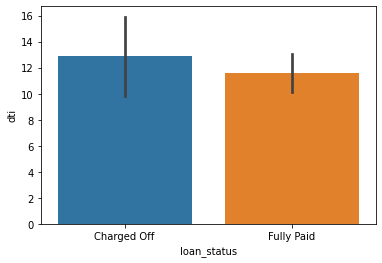

In [127]:
#plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(x='loan_status',y='dti',data=re_data)
"""plt.xticks(rotation=30, ha='right')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) """
plt.show()

. It is advisable to not approve loans for customers who have purpose as renewable energy and dti value greater than 11.61 which is the average dti value for which the customers paid off .

In [79]:
cc_data = df[df['purpose']=='credit_card']

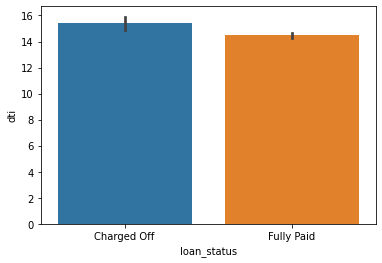

In [126]:
#plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(x='loan_status',y='dti',data=cc_data)
"""plt.xticks(rotation=30, ha='right')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) """
plt.show()

. It is advisable to not approve loans for customers who have purpose as credit card and dti value greater than 14.48 which is the average dti value for which the customers paid off .

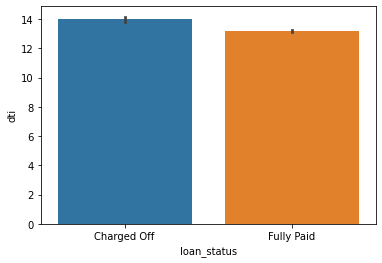

In [125]:
#plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(x='loan_status',y='dti',data=df)
"""plt.xticks(rotation=30, ha='right')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)""" 
plt.show()

. In general the difference in the average dti for customers who fully paid or charged off is not very significant but from the above graphs we can conclude that with respect to purpose we can distinguish the dti range for which the loans can be approved or discarded .

In [84]:
new_data = df[df.debt_amount < df.debt_amount.quantile(.85)]#,asce

<AxesSubplot:xlabel='loan_status', ylabel='count'>

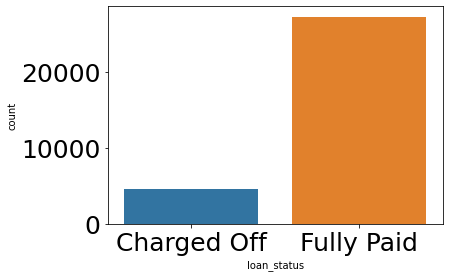

In [85]:
sns.countplot('loan_status',data = new_data)

Hereby we come to an end of the EDA of the loan data set and finding some of the drivers for loan default. There may be other findings that will help us understand the data set better so that we may find drivers for loan default. 


Minor Impact

•Higher loan amount (above 16K)
•Higher installment amount (above 327)
•Lower annual income (below 37K)
•Applicant’s address state (NV, SD, AK, FL, etc.)
•Loan issue month (Dec, May, Sep)


Heavy impact

•Higher interest rate (above 13%)
•Higher dti (above 15 %)
•Loan grade & sub-grade (D to G)
•Missing employment record
•Loan purpose (small business, renewable energy, educational)

Combined impact

•High loan amount & interest rate for lower income group
•Home ownership (other) and loan purpose (car, moving or small business)
•Income group and loan purpose
•DTI and loan purpose
•Residential state and loan purpose



